# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import (datasets,
                     dummy,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     preprocessing as skpre)

In [3]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# Baseline Classifiers and Metrics

### Baseline Classifiers

In [4]:
iris = datasets.load_iris()
print(iris.target_names)

tts = skms.train_test_split(iris.data, iris.target, 
                            test_size=.33, random_state=21)

(iris_train_ftrs, iris_test_ftrs, 
 iris_train_tgt,  iris_test_tgt) = tts

['setosa' 'versicolor' 'virginica']


In [5]:
# normal usage:  build-fit-predict-evaluate
baseline = dummy.DummyClassifier(strategy="most_frequent")
baseline.fit(iris_train_ftrs, iris_train_tgt)
base_preds = baseline.predict(iris_test_ftrs)
base_acc = metrics.accuracy_score(base_preds, iris_test_tgt)
print(base_acc)

0.3


In [6]:
strategies = ['constant', 'uniform', 'stratified', 
              'prior', 'most_frequent']

# setup args to create diff. DummyClassifier strategies
baseline_args = [{'strategy':s} for s in strategies]

# strategy is constant, the constant is 0 (setosa)
baseline_args[0]['constant'] = 0

accuracies = []
for bla in baseline_args:
    baseline = dummy.DummyClassifier(**bla)
    baseline.fit(iris_train_ftrs, iris_train_tgt)
    base_preds = baseline.predict(iris_test_ftrs)
    accuracies.append(metrics.accuracy_score(base_preds, iris_test_tgt))
    
display(pd.DataFrame({'accuracy':accuracies}, index=strategies))

,accuracy
constant,0.36
uniform,0.38
stratified,0.34
prior,0.30
most_frequent,0.30


### Baseline Metrics

In [7]:
# helpful stdlib tool for cleaning up printouts
import textwrap
print(textwrap.fill(str(sorted(metrics.SCORERS.keys())), 
                    width=70))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
'average_precision', 'balanced_accuracy', 'completeness_score',
'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples',
'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score',
'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples',
'jaccard_weighted', 'max_error', 'mutual_info_score',
'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error',
'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance',
'neg_mean_squared_error', 'neg_mean_squared_log_error',
'neg_median_absolute_error', 'neg_root_mean_squared_error',
'normalized_mutual_info_score', 'precision', 'precision_macro',
'precision_micro', 'precision_samples', 'precision_weighted', 'r2',
'recall', 'recall_macro', 'recall_micro', 'recall_samples',
'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted',
'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [8]:
knn = neighbors.KNeighborsClassifier()
help(knn.score) # verbose, but complete

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



# The Confusion Matrix

### Confusion Matrix for Iris

In [9]:
iris_preds = (neighbors.KNeighborsClassifier()
                       .fit(iris_train_ftrs, iris_train_tgt)
                       .predict(iris_test_ftrs))

print("accuracy:", metrics.accuracy_score(iris_test_tgt, 
                                          iris_preds))

cm = metrics.confusion_matrix(iris_test_tgt, 
                              iris_preds)
print("confusion matrix:", cm, sep="\n")

accuracy: 0.94
confusion matrix:
[[18  0  0]
 [ 0 16  1]
 [ 0  2 13]]


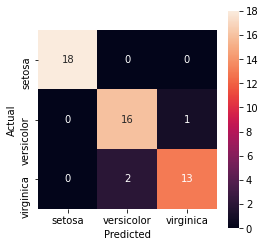

In [10]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(iris_test_tgt,
                              iris_preds)
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=iris.target_names, 
                 yticklabels=iris.target_names)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

### Confusion Matrix for "Is Versicolor"?

In [11]:
# is it versicolor or not?  
# (oc stands for "iris one class")
is_versicolor = np.where(iris.target == 1, 'versi', 'other')
oc_tts = skms.train_test_split(iris.data, is_versicolor, 
                               test_size=.33, random_state = 21)
(oc_train_ftrs, oc_test_ftrs,
 oc_train_tgt,  oc_test_tgt) = oc_tts

In [12]:
# this is a very different learning problem!
# the confusion matrix will be (possibly, likely) quite different
oc_preds = (neighbors.KNeighborsClassifier()
                     .fit(oc_train_ftrs, oc_train_tgt)
                     .predict(oc_test_ftrs))

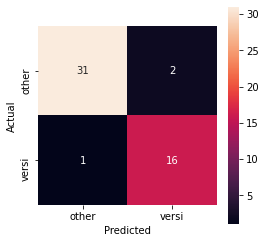

In [13]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
cm = metrics.confusion_matrix(oc_test_tgt, oc_preds)

class_labels = ['other', 'versi']
ax = sns.heatmap(cm, annot=True, square=True,
                 xticklabels=class_labels, 
                 yticklabels=class_labels)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual');

# Metrics from the Binary Confusion Matrix

Key Metrics:
 * accuracy
 * sensitivity/specificity
 * precision/recall (built-in)
 * TPR (true positive rate)
 * FPR (false positive rate)

In [14]:
cm = metrics.confusion_matrix(oc_test_tgt, oc_preds)
print(cm)

[[31  2]
 [ 1 16]]


In [15]:
# accuracy is "right" over "all"
builtin_acc = metrics.accuracy_score(oc_test_tgt, oc_preds)
manual_acc  = (31 + 16) / (31 + 2 + 1 + 16)
print('accuracy:', builtin_acc)
print('equal?', builtin_acc==manual_acc)

accuracy: 0.94
equal? True


In [16]:
# trick for accuracy:  
# "correct" is on diagonal
# "all" is ... everything
np.diag(cm).sum() / cm.sum()

0.94

|             | Pred True  | Pred False | Result |
|:-------------:|:------------:|:------------:|:---------:|
| Actual True | TP         | FN         |$\frac{TP}{(TP + FN)}$ = recall = sensitivity = TPR |
| Actual False| FP         | TN         |$\frac{TN}{(FP + TN)}$ = specificity  |
|  | $\frac{TP}{(TP + FP)}$ = precision| |

Note:
  * $\mathit{FPR} = 1-\text{specificity} = \frac{FP}{FP+TN}$
  * sometimes, people will say:
    * sensitivity is the "recall of the positive class"
    * specificity is the "recall of the negative class"

In [17]:
print(cm)

[[31  2]
 [ 1 16]]


In [18]:
# we can give these elements names:
# with these names, i'm taking "other"
# as the "positive class"
(tp, fn), (fp, tn) = cm

In [19]:
builtin_precision = metrics.precision_score(oc_test_tgt, 
                                            oc_preds, 
                                            pos_label='other')
manual_precision  = tp/(tp+fp)

print('precision:', builtin_precision)
print('equal?', builtin_precision == manual_precision)

precision: 0.96875
equal? True


In [20]:
builtin_recall = metrics.recall_score(oc_test_tgt, 
                                      oc_preds, 
                                      pos_label='other')

manual_recall  = tp/(tp+fn)

print('recall:', builtin_recall)
print('equal?', builtin_recall == manual_recall)

recall: 0.9393939393939394
equal? True


In [21]:
manual_specificity = tn/(fp+tn)
print('manual spec:', manual_specificity)

manual spec: 0.9411764705882353


In [22]:
# remember:  "specificity is recall of negative class"
# negative class for us is pos_label=1
recall_negclass = metrics.recall_score(oc_test_tgt, 
                                       oc_preds, 
                                       pos_label='versi')
print("recall 'negative class':", recall_negclass)

recall 'negative class': 0.9411764705882353


In [23]:
# FPR:  1 -specif.

In [24]:
# summarizing a few of these: 
# accuracy:      0.94
# precision:     0.96875
# recall(other): 0.9393
# recall(versi): 0.9411

In [25]:
print(metrics.classification_report(oc_test_tgt, 
                                    oc_preds, digits=3))

              precision    recall  f1-score   support

       other      0.969     0.939     0.954        33
       versi      0.889     0.941     0.914        17

    accuracy                          0.940        50
   macro avg      0.929     0.940     0.934        50
weighted avg      0.942     0.940     0.940        50



In [26]:
# what's f1?  it's a weird mix of precision and recall
# (technically it's called the "harmonic mean")
# reciprocal (1/x) of the average of the reciprocals
# 1 / (1/2 * (1/prec + 1/recall))
# = 2 / (1/prec + 1/recall)
f1 = 2 * (1 / (1/builtin_precision + 1/builtin_recall))
f1

0.9538461538461539

In [27]:
metrics.f1_score(oc_test_tgt, oc_preds, pos_label='other')

0.9538461538461539

# Understanding the ROC Curve and AUC

In [28]:
# AUC <-- ROC Curve <--- fpr, tpr

In [29]:
# we use a boolean target here to simplify tricky code below
is_versicolor = iris.target == 1
oc_tts = skms.train_test_split(iris.data, is_versicolor, 
                               test_size=.33, random_state = 21)
(oc_train_ftrs, oc_test_ftrs,
 oc_train_tgt,  oc_test_tgt) = oc_tts

In [30]:
# build, fit, predict (probability scores) for NB model
gnb = naive_bayes.GaussianNB()
prob_true = (gnb.fit(oc_train_ftrs, oc_train_tgt)
                .predict_proba(oc_test_ftrs)[:,1]) # [:,1]=="True"

In [31]:
fpr, tpr, thresh = metrics.roc_curve(oc_test_tgt, prob_true)
pd.DataFrame({'TPR':tpr, 'FPR':fpr}).T

,0,1,2,3,4,5,6,7,8
TPR,0.0,0.058824,0.882353,0.882353,0.941176,0.941176,1.000000,1.000000,1.0
FPR,0.0,0.000000,0.000000,0.060606,0.060606,0.121212,0.121212,0.181818,1.0


In [32]:
auc = metrics.auc(fpr, tpr)
print('AUC:', auc)

AUC: 0.9893048128342244


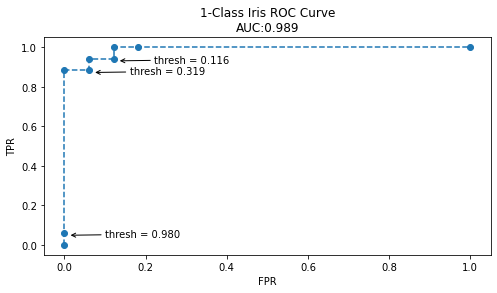

In [33]:
# create the main graph
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(fpr, tpr, 'o--')
ax.set_title("1-Class Iris ROC Curve\nAUC:{:.3f}".format(auc))
ax.set_xlabel("FPR") 
ax.set_ylabel("TPR");

# do a bit of work to label some points with their
# respective thresholds
investigate = np.array([1,3,5])
for idx in investigate:
    th, f, t = thresh[idx], fpr[idx], tpr[idx]
    ax.annotate('thresh = {:.3f}'.format(th), 
                xy=(f+.01, t-.01), xytext=(f+.1, t-.02),
                arrowprops = {'arrowstyle':'->'})

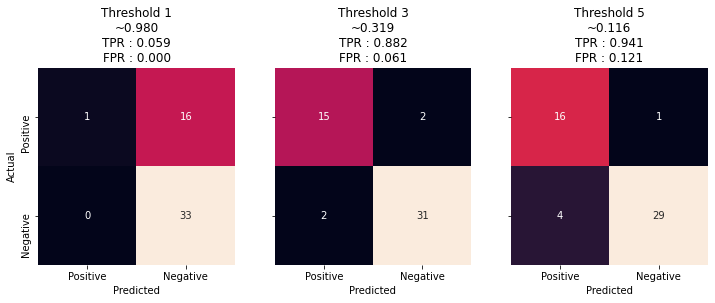

In [34]:
title_fmt = "Threshold {}\n~{:5.3f}\nTPR : {:.3f}\nFPR : {:.3f}"

pn = ['Positive', 'Negative']
add_args = {'xticklabels': pn,
            'yticklabels': pn,
            'square':True}

fig, axes = plt.subplots(1,3, sharey = True, figsize=(12,4))
for ax, thresh_idx in zip(axes.flat, investigate):
    preds_at_th = prob_true < thresh[thresh_idx]
    cm = metrics.confusion_matrix(1-oc_test_tgt, preds_at_th)
    sns.heatmap(cm, annot=True, cbar=False, ax=ax,
                **add_args)

    ax.set_xlabel('Predicted')
    ax.set_title(title_fmt.format(thresh_idx, 
                                  thresh[thresh_idx],
                                  tpr[thresh_idx], 
                                  fpr[thresh_idx]))
axes[0].set_ylabel('Actual');

In [35]:
# For example, with Threshold 3 (middle plot)
# FPR = 1 - specificity
#     = 1 - 31/(31+2) 
#     = 1 - 31/33 
#     = 0.0606... ~ 0.061

# Comparing Classifiers with ROC and PR Curves

### ROC Curve

In [36]:
models = {'base':dummy.DummyClassifier(strategy="uniform"),
          'gnb' :naive_bayes.GaussianNB(),
          '5-nn':neighbors.KNeighborsClassifier(n_neighbors=5)}

prob_true = {}
for mod_name, model in models.items():
    fit   = model.fit(oc_train_ftrs, oc_train_tgt)
    preds = fit.predict_proba(oc_test_ftrs)[:,1] # [:,1]=="True"
    prob_true[mod_name] = preds

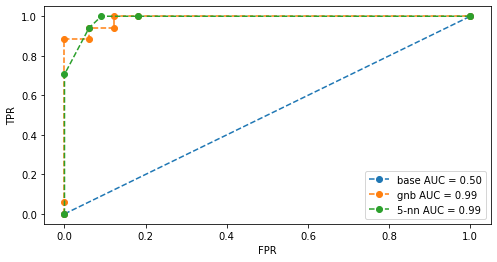

In [37]:
# make ROC plots
lbl_fmt = "{:s} AUC = {:.2f}"
fig,ax = plt.subplots(figsize=(8,4))
for mod_name, pt in prob_true.items():
    fpr, tpr, _ = metrics.roc_curve(oc_test_tgt, pt)
    label = lbl_fmt.format(mod_name, metrics.auc(fpr,tpr))
    ax.plot(fpr, tpr, 'o--', label=label)
ax.legend()
ax.set_xlabel("FPR")
ax.set_ylabel("TPR");

### Precision-Recall Curve

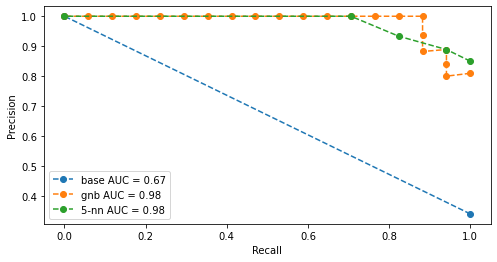

In [38]:
# make pr plots
lbl_fmt = "{:s} AUC = {:.2f}"
fig,ax = plt.subplots(figsize=(8,4))
for mod_name, pt in prob_true.items():
    prc = metrics.precision_recall_curve
    precision, recall, _ = prc(oc_test_tgt, pt)
    label = lbl_fmt.format(mod_name, metrics.auc(recall, precision))
    ax.plot(recall, precision, 'o--', label=label)
ax.legend()
ax.set_xlabel("Recall")
ax.set_ylabel("Precision");